In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
    
# Import the data
signal_data = pd.read_hdf("/dice/projects/CMS/Hinv/datasets_for_ml_training/ttH/df_ml_inputs.hd5")
background_data = pd.read_hdf("/dice/projects/CMS/Hinv/datasets_for_ml_training/ttBar/df_ml_inputs.hd5")

# Remove regions 1-5 as they contain data not suitable for training

signal_data = signal_data[~signal_data.region.isin([1, 2, 3, 4, 5])]
background_data = background_data[~background_data.region.isin([1, 2, 3, 4, 5])]

In [2]:
cleanedJet_area = signal_data['cleanedJet_area']
cleanedJet_mass = signal_data['cleanedJet_mass']
cleanedJet_pt = signal_data['cleanedJet_pt']
cleanedJet_eta = signal_data['cleanedJet_eta']
cleanedJet_phi = signal_data['cleanedJet_phi']

jet_vars = [cleanedJet_area, cleanedJet_mass, cleanedJet_pt, cleanedJet_eta, cleanedJet_phi]

for j in jet_vars:
    count = 0
    for arr in j:
        count += arr.shape[0]
    print(f"Average number of jets per event: {count / cleanedJet_area.shape[0]} for {j.name}")


Average number of jets per event: 6.2076545728828645 for cleanedJet_area
Average number of jets per event: 6.2076545728828645 for cleanedJet_mass
Average number of jets per event: 6.2076545728828645 for cleanedJet_pt
Average number of jets per event: 6.2076545728828645 for cleanedJet_eta
Average number of jets per event: 6.2076545728828645 for cleanedJet_phi


In [3]:
# Now for background

cleanedJet_area = background_data['cleanedJet_area']
cleanedJet_mass = background_data['cleanedJet_mass']
cleanedJet_pt = background_data['cleanedJet_pt']
cleanedJet_eta = background_data['cleanedJet_eta']
cleanedJet_phi = background_data['cleanedJet_phi']

jet_vars = [cleanedJet_area, cleanedJet_mass, cleanedJet_pt, cleanedJet_eta, cleanedJet_phi]

for j in jet_vars:
    count = 0
    for arr in j:
        count += arr.shape[0]
    print(f"Average number of jets per event: {count / cleanedJet_area.shape[0]} for {j.name}")


Average number of jets per event: 5.94031164622577 for cleanedJet_area
Average number of jets per event: 5.94031164622577 for cleanedJet_mass
Average number of jets per event: 5.94031164622577 for cleanedJet_pt
Average number of jets per event: 5.94031164622577 for cleanedJet_eta
Average number of jets per event: 5.94031164622577 for cleanedJet_phi


This is to be expected as we want 6 jets per event so these values seem reasonable
Now lets flatten the arrays and plot them 

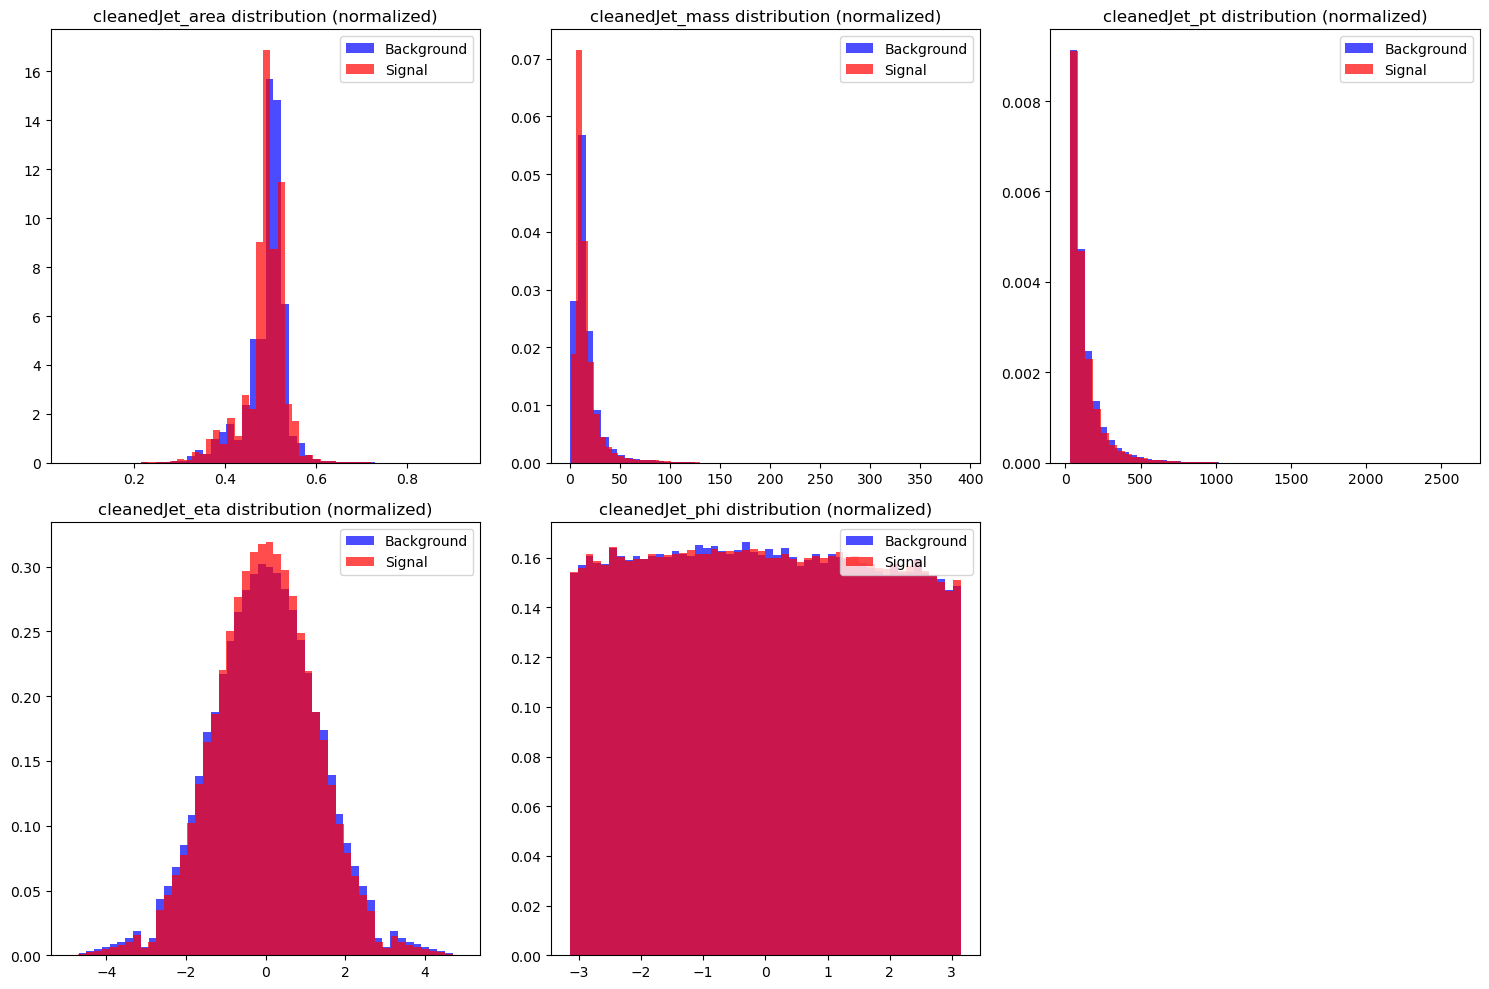

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Column names
jet_var_names = ['cleanedJet_area', 'cleanedJet_mass', 'cleanedJet_pt', 'cleanedJet_eta', 'cleanedJet_phi']

# Set up a 2x3 grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Plot each variable distribution
for i, var_name in enumerate(jet_var_names):
    row, col = divmod(i, 3)  # Determine row and column in subplot grid
    
    # Flatten arrays for signal and background data
    signal_flat = np.concatenate(signal_data[var_name].values)
    background_flat = np.concatenate(background_data[var_name].values)
    
    # Plot normalized distributions
    axs[row, col].hist(background_flat, bins=50, alpha=0.7, label='Background', density=True, color='blue')
    axs[row, col].hist(signal_flat, bins=50, alpha=0.7, label='Signal', density=True, color='red')
    axs[row, col].set_title(f'{var_name} distribution (normalized)')
    axs[row, col].legend()

# Hide the last unused subplot
axs[1, 2].axis('off')

plt.tight_layout()
plt.show()


Now plot averages

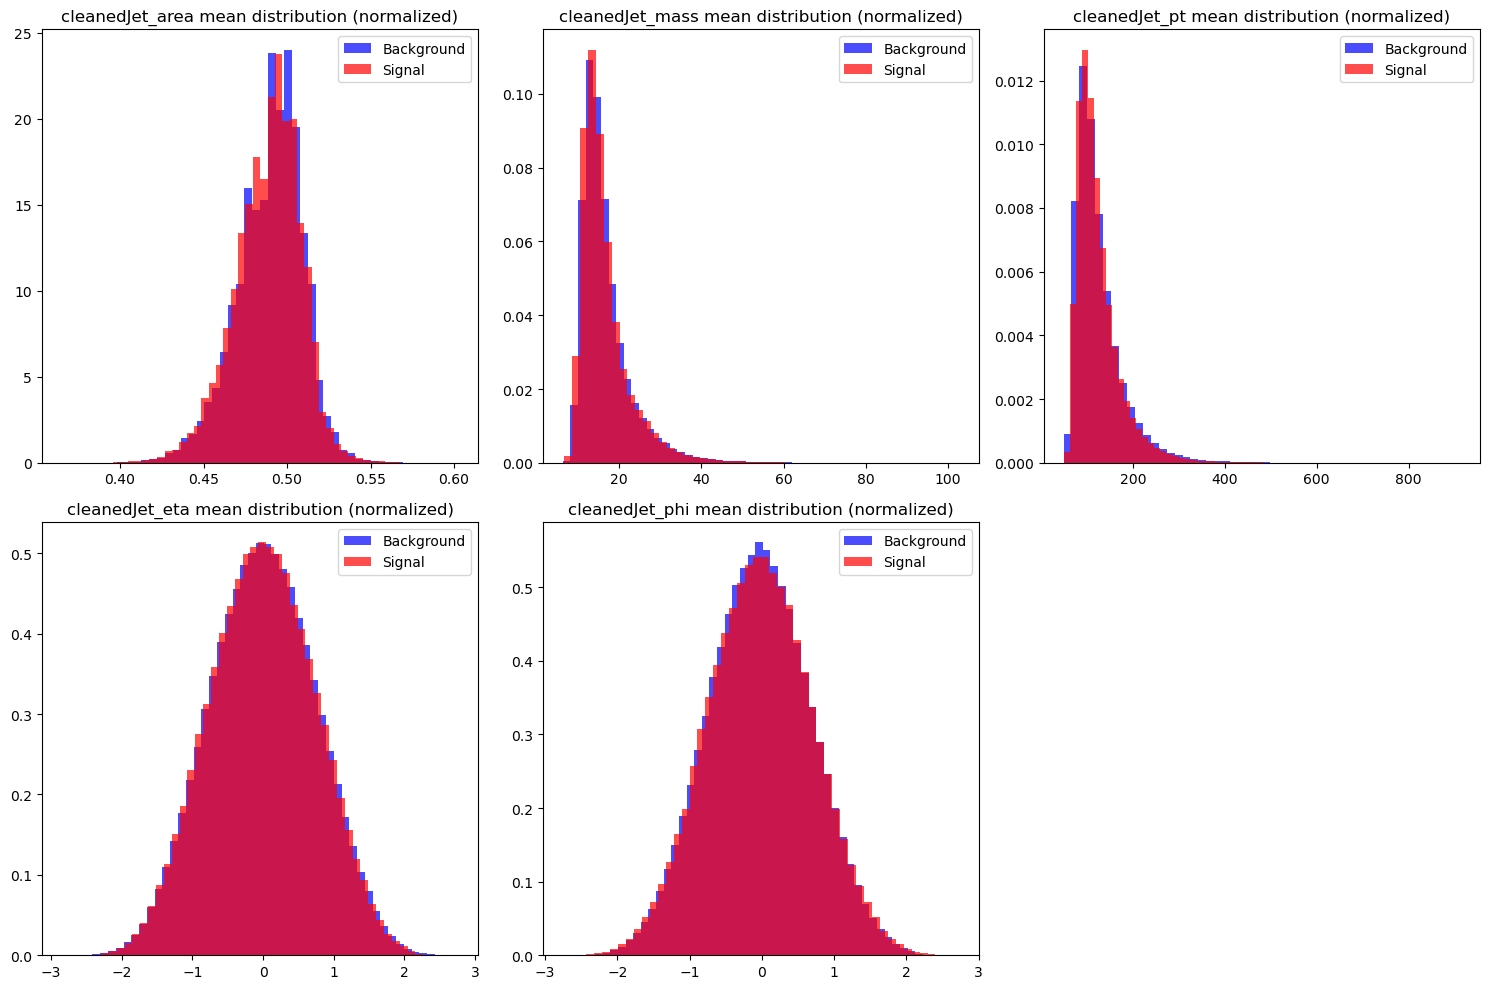

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Column names
jet_var_names = ['cleanedJet_area', 'cleanedJet_mass', 'cleanedJet_pt', 'cleanedJet_eta', 'cleanedJet_phi']

# Set up a 2x3 grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Plot each variable distribution
for i, var_name in enumerate(jet_var_names):
    row, col = divmod(i, 3)  # Determine row and column in subplot grid
    
    # Calculate the mean for each event for signal and background data
    signal_means = np.array([np.mean(arr) for arr in signal_data[var_name] if len(arr) > 0])
    background_means = np.array([np.mean(arr) for arr in background_data[var_name] if len(arr) > 0])
    
    # Plot normalized distributions of the means
    axs[row, col].hist(background_means, bins=50, alpha=0.7, label='Background', density=True, color='blue')
    axs[row, col].hist(signal_means, bins=50, alpha=0.7, label='Signal', density=True, color='red')
    axs[row, col].set_title(f'{var_name} mean distribution (normalized)')
    axs[row, col].legend()

# Hide the last unused subplot
axs[1, 2].axis('off')

plt.tight_layout()
plt.show()


Now plot the first jet from each array

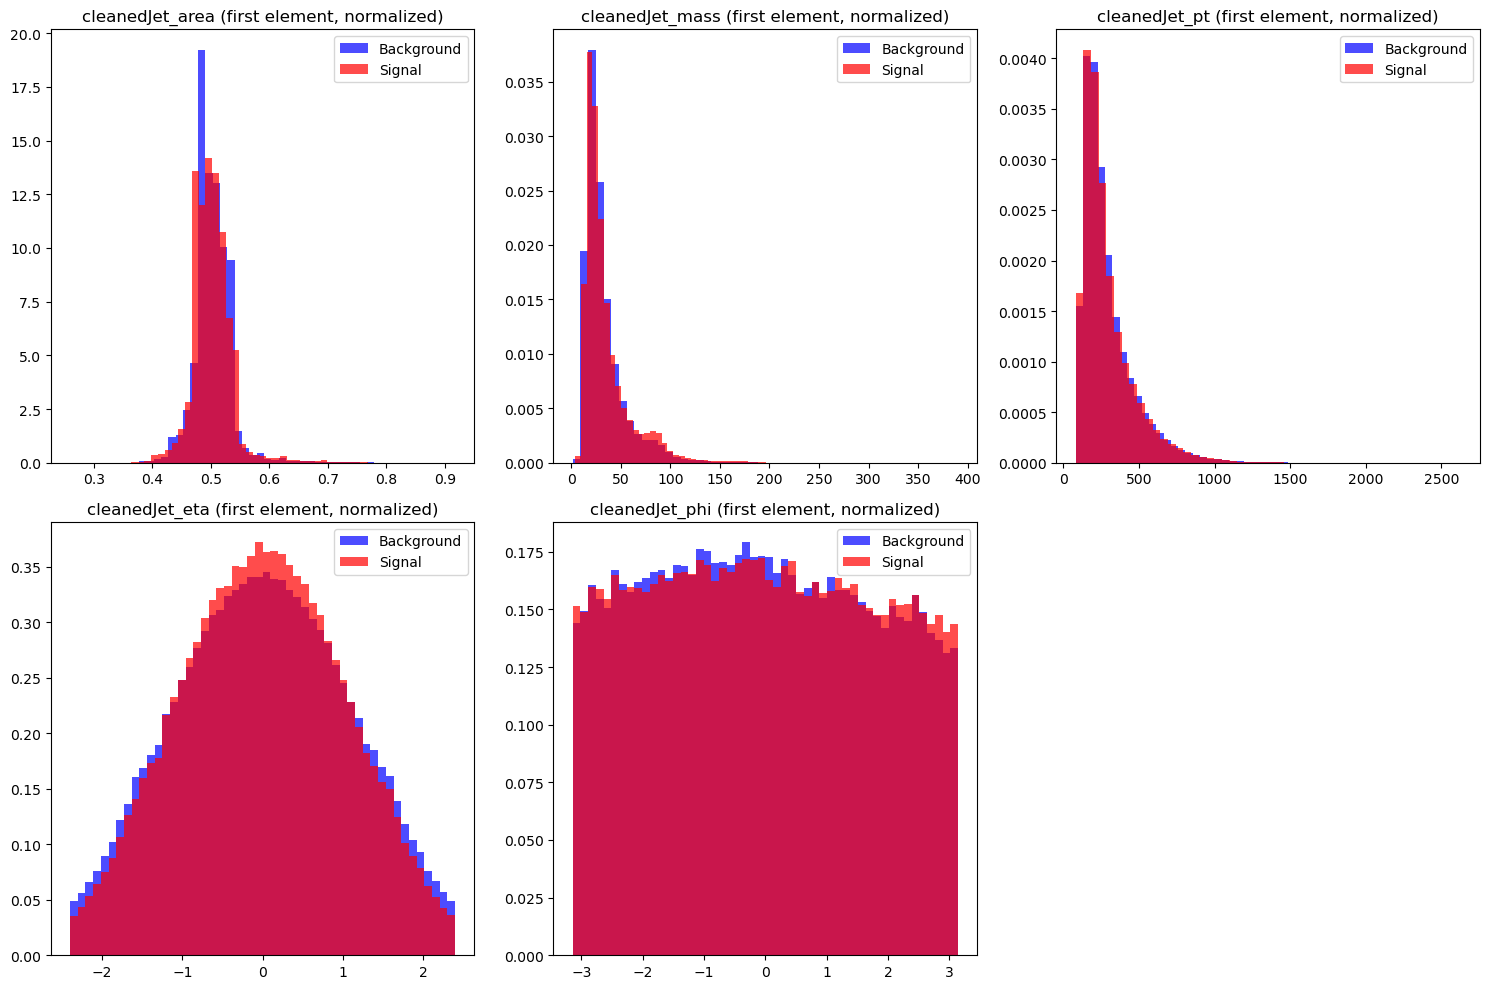

In [18]:
# Column names
jet_var_names = ['cleanedJet_area', 'cleanedJet_mass', 'cleanedJet_pt', 'cleanedJet_eta', 'cleanedJet_phi']

# Set up a 2x3 grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Plot each variable distribution
for i, var_name in enumerate(jet_var_names):
    row, col = divmod(i, 3)  # Determine row and column in subplot grid
    
    # Use the first element from each array in signal and background data
    signal_first = np.array([arr[0] for arr in signal_data[var_name] if len(arr) > 0])
    background_first = np.array([arr[0] for arr in background_data[var_name] if len(arr) > 0])
    
    # Plot normalized distributions
    axs[row, col].hist(background_first, bins=50, alpha=0.7, label='Background', density=True, color='blue')
    axs[row, col].hist(signal_first, bins=50, alpha=0.7, label='Signal', density=True, color='red')
    axs[row, col].set_title(f'{var_name} (first element, normalized)')
    axs[row, col].legend()

# Hide the last unused subplot
axs[1, 2].axis('off')

plt.tight_layout()
plt.show()


### Plotting max value 

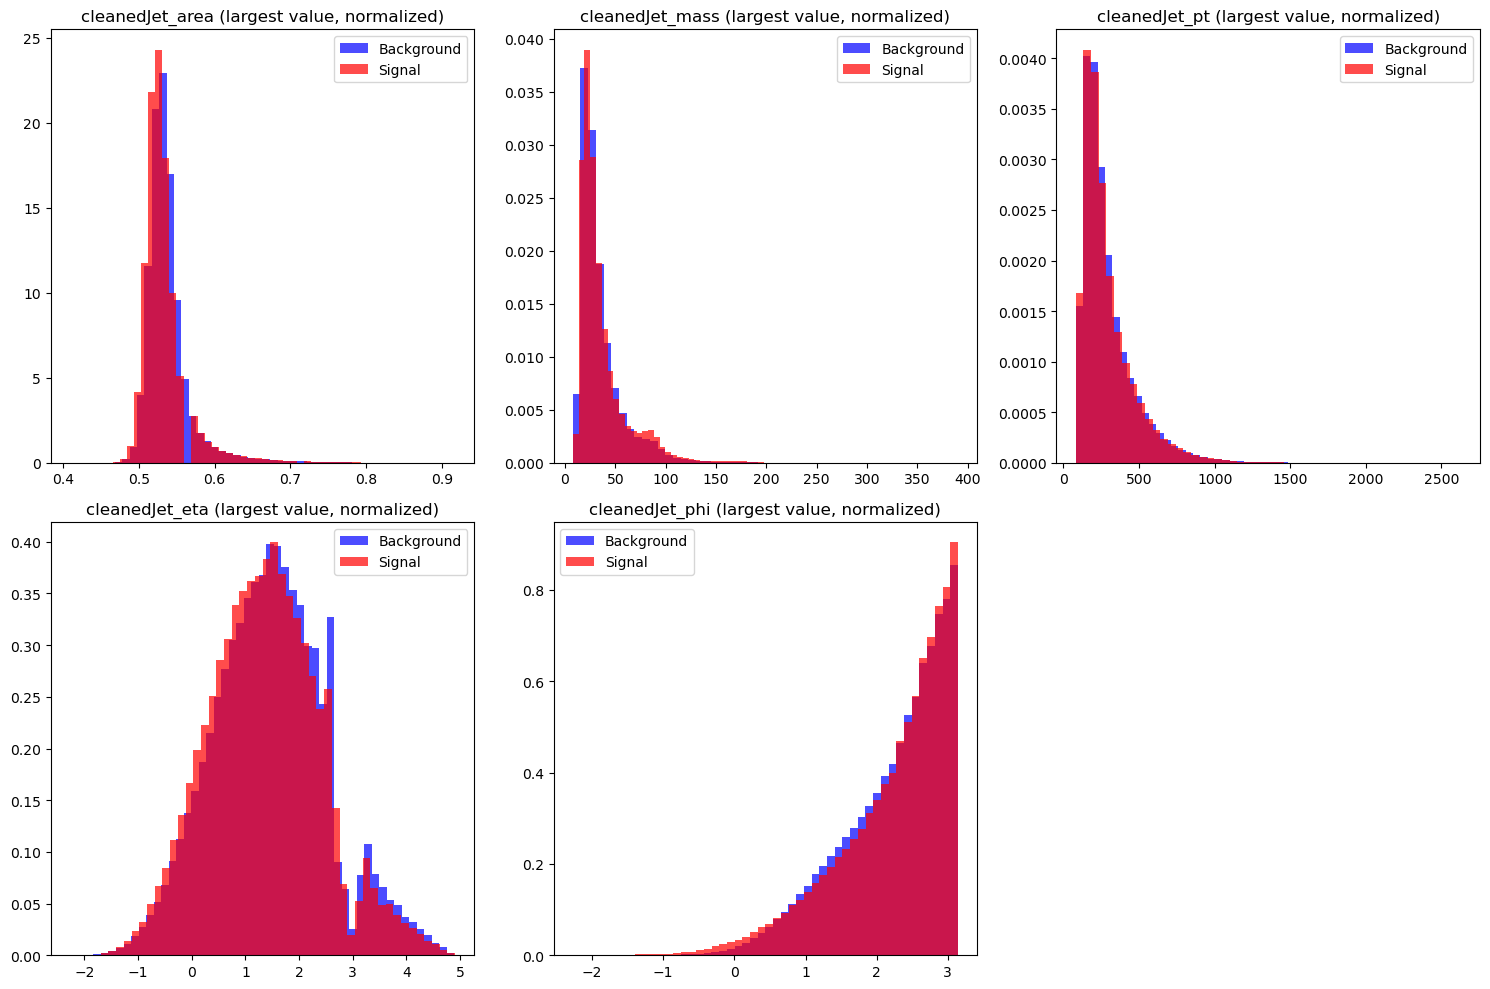

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Column names
jet_var_names = ['cleanedJet_area', 'cleanedJet_mass', 'cleanedJet_pt', 'cleanedJet_eta', 'cleanedJet_phi']

# Set up a 2x3 grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Plot each variable distribution
for i, var_name in enumerate(jet_var_names):
    row, col = divmod(i, 3)  # Determine row and column in subplot grid
    
    # Use the largest value from each array in signal and background data
    signal_max = np.array([np.max(arr) for arr in signal_data[var_name] if len(arr) > 0])
    background_max = np.array([np.max(arr) for arr in background_data[var_name] if len(arr) > 0])
    
    # Plot normalized distributions
    axs[row, col].hist(background_max, bins=50, alpha=0.7, label='Background', density=True, color='blue')
    axs[row, col].hist(signal_max, bins=50, alpha=0.7, label='Signal', density=True, color='red')
    axs[row, col].set_title(f'{var_name} (largest value, normalized)')
    axs[row, col].legend()

# Hide the last unused subplot
axs[1, 2].axis('off')

plt.tight_layout()
plt.show()


Max magnitude (+ve or -ve)

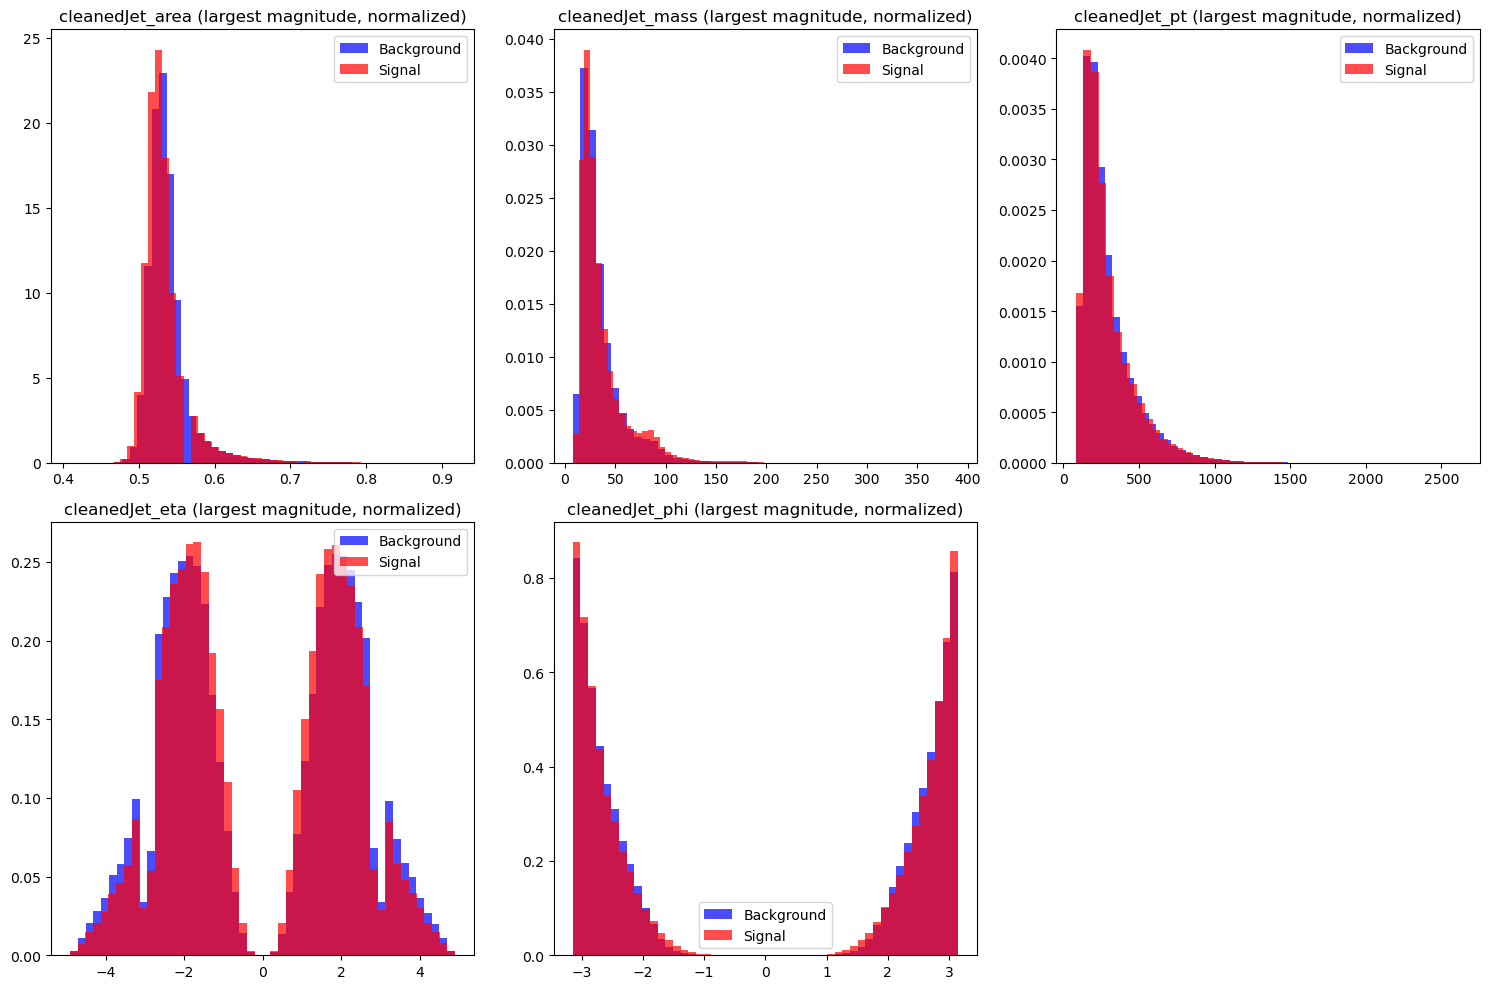

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Column names
jet_var_names = ['cleanedJet_area', 'cleanedJet_mass', 'cleanedJet_pt', 'cleanedJet_eta', 'cleanedJet_phi']

# Set up a 2x3 grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Plot each variable distribution
for i, var_name in enumerate(jet_var_names):
    row, col = divmod(i, 3)  # Determine row and column in subplot grid
    
    # Use the largest magnitude value from each array in signal and background data
    signal_max_magnitude = np.array([arr[np.argmax(np.abs(arr))] for arr in signal_data[var_name] if len(arr) > 0])
    background_max_magnitude = np.array([arr[np.argmax(np.abs(arr))] for arr in background_data[var_name] if len(arr) > 0])
    
    # Plot normalized distributions
    axs[row, col].hist(background_max_magnitude, bins=50, alpha=0.7, label='Background', density=True, color='blue')
    axs[row, col].hist(signal_max_magnitude, bins=50, alpha=0.7, label='Signal', density=True, color='red')
    axs[row, col].set_title(f'{var_name} (largest magnitude, normalized)')
    axs[row, col].legend()

# Hide the last unused subplot
axs[1, 2].axis('off')

plt.tight_layout()
plt.show()
